In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch import nn

from src import config, datasource
from src import models as notebook_models

sns.set_theme()
%matplotlib inline


In [7]:
settings = config.get_settings()

In [8]:
df_data = datasource.get_data_frame()
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4976 entries, 0 to 4975
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   class     4976 non-null   object
 1   filename  4976 non-null   object
dtypes: object(2)
memory usage: 77.9+ KB


In [9]:
train, val, test = datasource.get_train_validate_test(df_data=df_data)

train_loader = datasource.get_data_loader(train)
val_loader = datasource.get_data_loader(val)
test_loader = datasource.get_data_loader(test)


In [10]:
device = settings.DEVICE
num_classes = 3
num_abcd_features = 5
model = notebook_models.ResNetCosineModel(num_abcd_features=num_abcd_features, num_classes=num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-3)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)
py_model = notebook_models.PyTorchModel(model, criterion, optimizer, scheduler)

c:\Users\User\Desktop\melanoma-classification-deep-learning\venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\User\Desktop\melanoma-classification-deep-learning\venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1 / 30  - Loss: 384.389, Train Acc: 0.6878, Val Acc: 0.5893
Epoch 2 / 30  - Loss: 281.7298, Train Acc: 0.739, Val Acc: 0.8103
Epoch 3 / 30  - Loss: 223.0061, Train Acc: 0.8082, Val Acc: 0.8571
Epoch 4 / 30  - Loss: 192.4774, Train Acc: 0.8414, Val Acc: 0.8281
Epoch 5 / 30  - Loss: 172.8559, Train Acc: 0.8583, Val Acc: 0.8125
Epoch 6 / 30  - Loss: 159.5096, Train Acc: 0.866, Val Acc: 0.8772
Epoch 7 / 30  - Loss: 150.2312, Train Acc: 0.8752, Val Acc: 0.8594
Epoch 8 / 30  - Loss: 143.4653, Train Acc: 0.8772, Val Acc: 0.8839
Epoch 9 / 30  - Loss: 135.43, Train Acc: 0.8831, Val Acc: 0.8951
Epoch 10 / 30  - Loss: 121.3047, Train Acc: 0.8968, Val Acc: 0.8884
Epoch 11 / 30  - Loss: 108.5588, Train Acc: 0.9124, Val Acc: 0.9174
Epoch 12 / 30  - Loss: 95.3978, Train Acc: 0.9266, Val Acc: 0.9196
Epoch 13 / 30  - Loss: 93.6393, Train Acc: 0.9295, Val Acc: 0.9286
Epoch 14 / 30  - Loss: 91.9658, Train Acc: 0.9243, Val Acc: 0.9286
Epoch 15 / 30  - Loss: 88.0001, Train Acc: 0.9323, Val Acc: 0.933

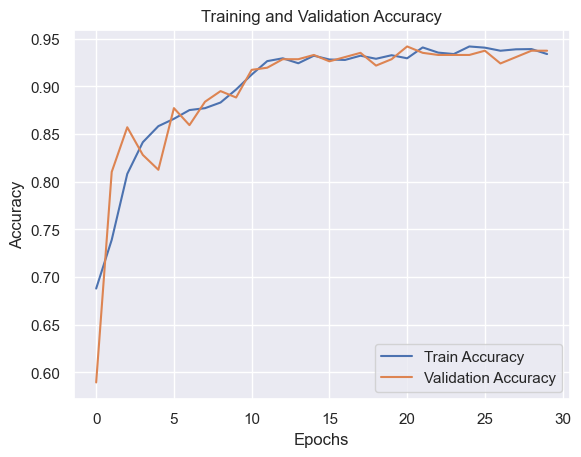

In [11]:
epochs = 30
py_model.fit(train_loader, val_loader, epochs)
py_model.plot_training_and_validation_accuracy()
plt.show()


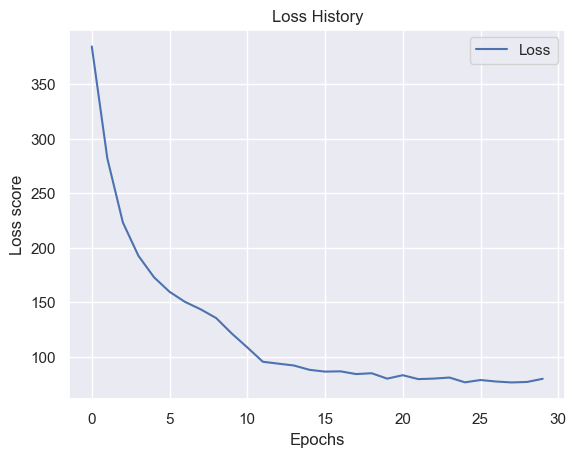

In [12]:
py_model.plot_loss()
plt.show()


In [13]:
f1 = py_model.evaluate_on_test_f1(test_loader)
print(f"Test F1 Score: {f1:.4f}")


Test F1 Score: 0.9478


In [15]:
torch.save(py_model.model.state_dict(), "./experiments/weights/resnet18_melanoma_with_abcd.pth")
print("✅ Модель сохранена!")

✅ Модель сохранена!
